In [33]:
%pip install wbdata
%pip install plotly
%pip install iso3166
import wbdata
import pandas as pd
import warnings
import iso3166
warnings.filterwarnings("ignore", message="Key .* not in persistent cache")

pd.options.plotting.backend = 'plotly'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [10]:
wbdata.get_topics()

  id  value
----  -------------------------------
   1  Agriculture & Rural Development
   2  Aid Effectiveness
   3  Economy & Growth
   4  Education
   5  Energy & Mining
   6  Environment
   7  Financial Sector
   8  Health
   9  Infrastructure
  10  Social Protection & Labor
  11  Poverty
  12  Private Sector
  13  Public Sector
  14  Science & Technology
  15  Social Development
  16  Urban Development
  17  Gender
  18  Millenium development goals
  19  Climate Change
  20  External Debt
  21  Trade

In [11]:
wbdata.get_indicators(topic=17)

id                    name
--------------------  -------------------------------------------------------------------------------------------------------------------------------------------
IC.FRM.FEMM.ZS        Firms with female top manager (% of firms)
IC.FRM.FEMO.ZS        Firms with female participation in ownership (% of firms)
SE.ADT.1524.LT.FE.ZS  Literacy rate, youth female (% of females ages 15-24)
SE.ADT.1524.LT.FM.ZS  Literacy rate, youth (ages 15-24), gender parity index (GPI)
SE.ADT.1524.LT.MA.ZS  Literacy rate, youth male (% of males ages 15-24)
SE.ADT.LITR.FE.ZS     Literacy rate, adult female (% of females ages 15 and above)
SE.ADT.LITR.MA.ZS     Literacy rate, adult male (% of males ages 15 and above)
SE.ENR.PRIM.FM.ZS     School enrollment, primary (gross), gender parity index (GPI)
SE.ENR.PRSC.FM.ZS     School enrollment, primary and secondary (gross), gender parity index (GPI)
SE.ENR.SECO.FM.ZS     School enrollment, secondary (gross), gender parity index (GPI)
SE.EN

In [17]:
vars = {"SP.POP.2529.MA":"Population"}

use=["BRA","ECU","VEN","COL","PER","BOL"]

population = wbdata.get_dataframe(vars, country=use).squeeze().unstack('country')

In [18]:
population

country,Bolivia,Brazil,Colombia,Ecuador,Peru,"Venezuela, RB"
date,,,,,,
1960,136680.0,2658615.0,540798.0,157442.0,369548.0,291708.0
1961,138727.0,2707118.0,551616.0,161529.0,378970.0,298958.0
1962,140868.0,2766510.0,562224.0,165700.0,387734.0,306384.0
1963,143246.0,2837054.0,573264.0,170098.0,395713.0,314160.0
1964,146082.0,2920680.0,586280.0,175017.0,403082.0,322438.0
...,...,...,...,...,...,...
2019,515809.0,8222058.0,2190540.0,754475.0,1338617.0,1038249.0
2020,521844.0,8198543.0,2244256.0,764960.0,1347603.0,972737.0
2021,527107.0,8196510.0,2274977.0,770724.0,1353642.0,937830.0


In [82]:
population.loc["1990"]

country
Bolivia           322571.0
Brazil           6937745.0
Colombia         1665170.0
Ecuador           506062.0
Peru             1049562.0
Venezuela, RB     948313.0
Name: 1990, dtype: float64

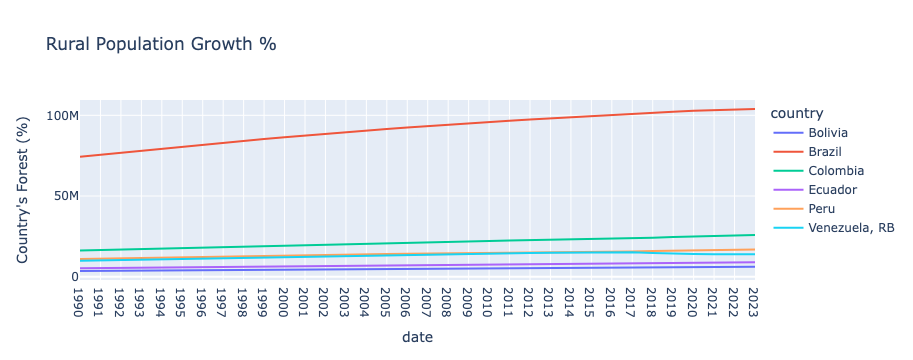

In [64]:
rural_density=rural_density.loc["1990":]
plot = rural_density.plot(title="Rural Population Growth %", labels={"index": "Year", "value": "Country's Forest (%)"})
plot.show()

In [13]:
vars = {"SP.POP.AG.2024.MA.IN":"Rural Growth"}

use=["BRA","ECU","VEN","COL","PER","BOL"]

#rural_density = wbdata.get_dataframe(vars, country=use).squeeze().unstack('country')

In [15]:
#pop_stats.loc["1980":]

In [89]:
def age_helper(age_range):
    lower, upper = age_range
    # Find the closest lower multiple of 5
    start = (lower // 5) * 5
    # Generate the age ranges
    age_ranges = []
    for age in range(start, upper, 5):
        if age >= 80:
            age_ranges.append("80UP")
            break
        next_age = age + 4
        if next_age >= 80:
            age_ranges.append("80UP")
            break
        age_ranges.append(f"{age:02d}{next_age:02d}")
    
    return age_ranges

In [92]:
age_helper((2,90))

['0004',
 '0509',
 '1014',
 '1519',
 '2024',
 '2529',
 '3034',
 '3539',
 '4044',
 '4549',
 '5054',
 '5559',
 '6064',
 '6569',
 '7074',
 '7579',
 '80UP']

In [49]:
def population(year, sex, age_range, place):
    def age_helper(age_range):
        lower, upper = age_range
        start = (lower // 5) * 5
        age_ranges = []
        for age in range(start, upper + 1, 5):
            if age >= 80:
                age_ranges.append("80UP")
                break
            next_age = age + 4
            if next_age >= 80:
                age_ranges.append("80UP")
                break
            age_ranges.append(f"{age:02d}{next_age:02d}")
        return age_ranges

    # Generate the age ranges
    age_ranges = age_helper(age_range)


    if place.lower() == "world":
        name_alpha3 = "WLD"
        name_actual = "World"
    else:
        name_alpha3 = iso3166.countries.get(place).alpha3                        
        name_actual = iso3166.countries.get(place).apolitical_name

    # Construct the indicator codes
    indicator = 'SP.POP.'
    sex_indicators = []
    for age in age_ranges:
        if sex.lower() == 'male':
            sex_indicators.append(f"{indicator}{age}.MA")
        elif sex.lower() == 'female':
            sex_indicators.append(f"{indicator}{age}.FE")
        else:
            sex_indicators.append(f"{indicator}{age}.IN")


    # Prepare the indicators for wbdata
    pop_indicators = {ind: "Population" for ind in sex_indicators}
    total = 0
    for i in pop_indicators:
        hold = {i:"Population"}
        retrieve_year = wbdata.get_dataframe(hold, country=name_alpha3, date=(str(year), str(year)), parse_dates=True)
        retrieve_year = retrieve_year.reset_index()
       # print(retrieve_year)
        total += retrieve_year['Population'].iloc[0].item() 
    #return retrieve_year['Population'].iloc[0].item() #problem here is we need to sum up all of the populations

    print("In the year {}, there are {} {}s aged {} to {} living in {}.".format(year, total, sex, age_range[0], age_range[1], name_actual))
    return total


result = population(2000, 'male', (20, 60), 'brazil')
result

In the year 2000, there are 47111262.0 males aged 20 to 60 living in Brazil.


47111262.0

In [ ]:
#
if place.lower() == "world":
        name_alpha3 = "WLD"
        name_actual = "World"
    else:
        name_alpha3 = iso3166.countries.get(location).alpha3                        
        name_actual = iso3166.countries.get(location).apolitical_name